In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# Loading the file into Jupyter Notebook

In [2]:
df = pd.read_csv(r'E:\MyProject\Python Project\archive\healthcare_dataset.csv')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,11/17/2022,Patrick Parker,Wallace-Hamilton,Medicare,37491,146,Elective,12/1/2022,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,6/1/2023,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304,404,Emergency,6/15/2023,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,1/9/2019,Paul Baker,Walton LLC,Medicare,36875,292,Emergency,2/8/2019,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,5/2/2020,Brian Chandler,Garcia Ltd,Medicare,23303,480,Urgent,5/3/2020,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,7/9/2021,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086,477,Urgent,8/2/2021,Paracetamol,Normal


# Data Cleaning

In [3]:
# Checking the data types of columns
print(df.dtypes)

Name                  object
Age                    int64
Gender                object
Blood Type            object
Medical Condition     object
Date of Admission     object
Doctor                object
Hospital              object
Insurance Provider    object
Billing Amount         int64
Room Number            int64
Admission Type        object
Discharge Date        object
Medication            object
Test Results          object
dtype: object


In [4]:
# Droping rows with missing values
df.dropna(inplace=True)

In [5]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [6]:
# Converting 'Date of Admission' and 'Discharge date' columns to datetime format
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [7]:
# Saving the cleaned dataset
df.to_csv('healthcare_dataset.csv', index=False)

# Data Analysis

# Question 1: which gender has more disease?

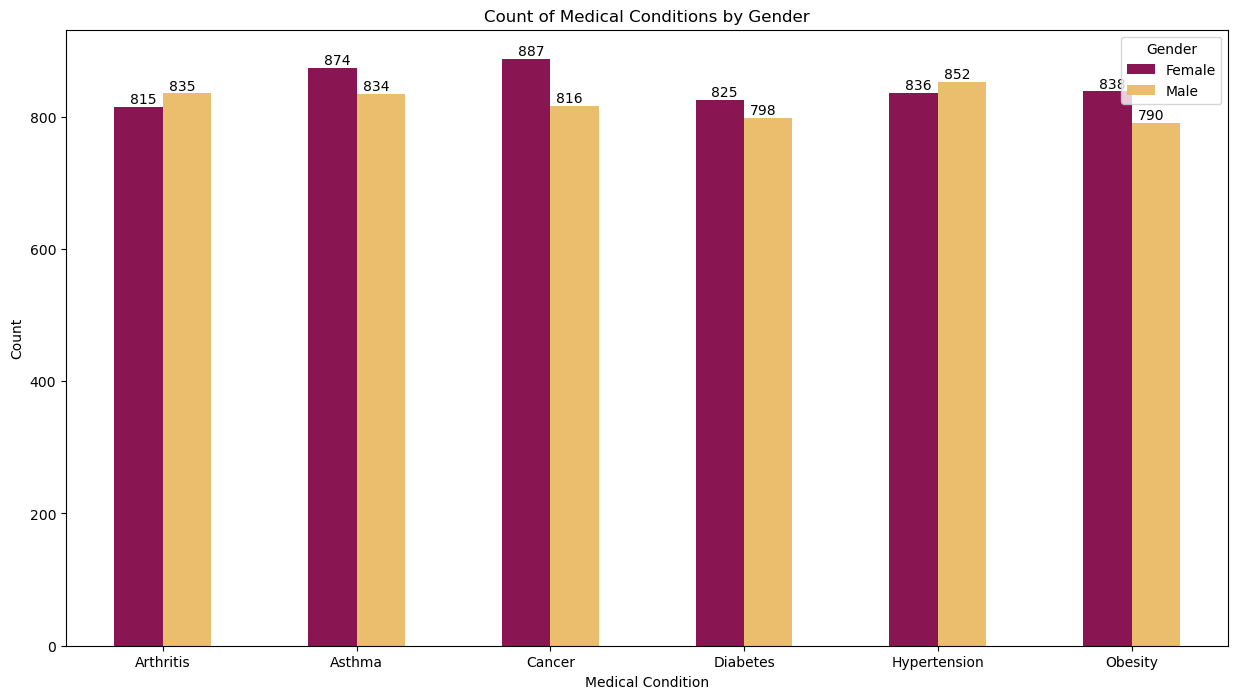

In [8]:
Medical_Conditions = df.groupby(['Medical Condition', 'Gender']).size().unstack(fill_value=0)

# Plotting
Medical_Conditions.plot(kind='bar', figsize=(15,8), color=["#891652", "#EABE6C"])
plt.title('Count of Medical Conditions by Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)  
plt.legend(title='Gender')

for i, (label, row) in enumerate(Medical_Conditions.iterrows()):
    for j, count in enumerate(row):
        plt.text(i + j * 0.2 - 0.1, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

# Question 2: Distribution of Age Group which has more Cases?

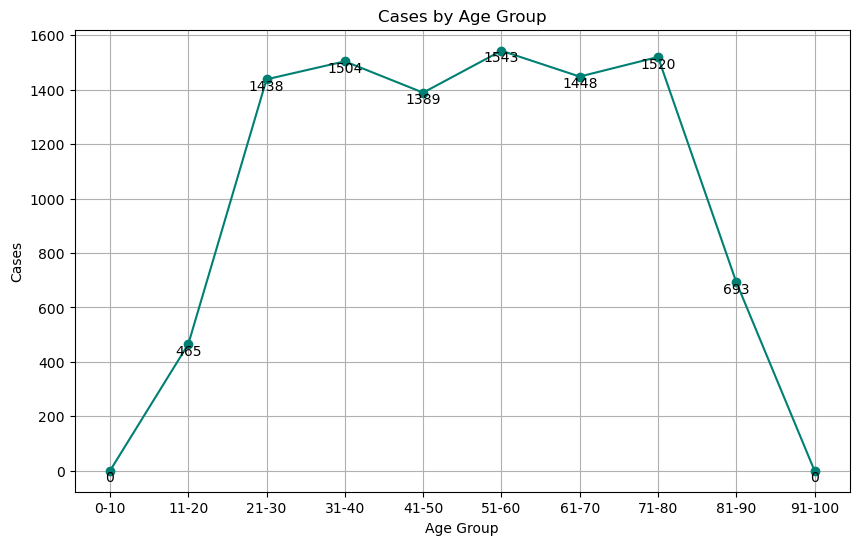

In [9]:
age_bins = [0,10,20,30,40,50,60,70,80,90,100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50','51-60', '61-70', '71-80', '81-90', '91-100']

# Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Cases in each age group
age_group_counts = df.groupby('Age Group').size().reset_index(name='Count')

# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(age_group_counts['Age Group'], age_group_counts['Count'], marker='o', color='#007F73', linestyle='-')
plt.title('Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Cases')
plt.xticks(rotation=0)

for i, (label, count) in enumerate(age_group_counts.values):
    plt.text(i, count, str(count), ha='center', va='top')

plt.grid(True)
plt.show()

# Question 3: What is the most Commonly prescribed medication?

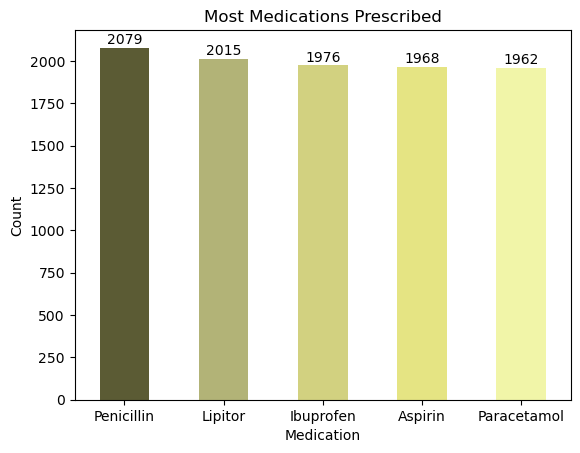

In [10]:
# most common medications
top_medications = df['Medication'].value_counts()

# Plot bar chart of common medications
ax = top_medications.plot(kind='bar', color=['#5b5b34','#B2B377','#D2D180','#E5E483','#F1F5A8'])
ax.set_title('Most Medications Prescribed')
ax.set_xlabel('Medication')
ax.set_ylabel('Count')
ax.set_xticklabels(top_medications.index, rotation=0, ha='center')

for i, v in enumerate(top_medications):
    ax.text(i, v + 5, str(v), ha='center', va='bottom')

plt.show()

# Question 4: Which Insurance Providers Account for the Highest Billing Amounts?

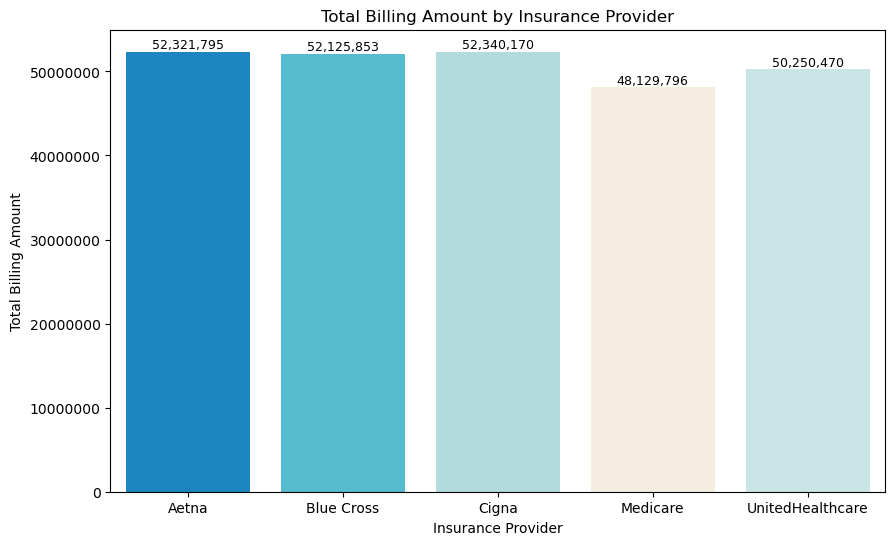

In [11]:
billing_sum_by_insurance = df.groupby('Insurance Provider')['Billing Amount'].sum().reset_index()

#the bar plot
plt.figure(figsize=(10, 6))
sb.barplot(data=billing_sum_by_insurance, x='Insurance Provider', y='Billing Amount', 
            palette=['#008DDA', '#41C9E2', '#ACE2E1','#F7EEDD','#C4EAEA'])
plt.title('Total Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Total Billing Amount')
plt.xticks(rotation=0)


for index, row in billing_sum_by_insurance.iterrows():
    plt.text(index, row['Billing Amount'], f"{row['Billing Amount']:,.0f}", ha='center', va='bottom', fontsize=9)


plt.ticklabel_format(style='plain', axis='y')

plt.show()

# Question 5: What is the trend in yearly admissions of cancer patients?

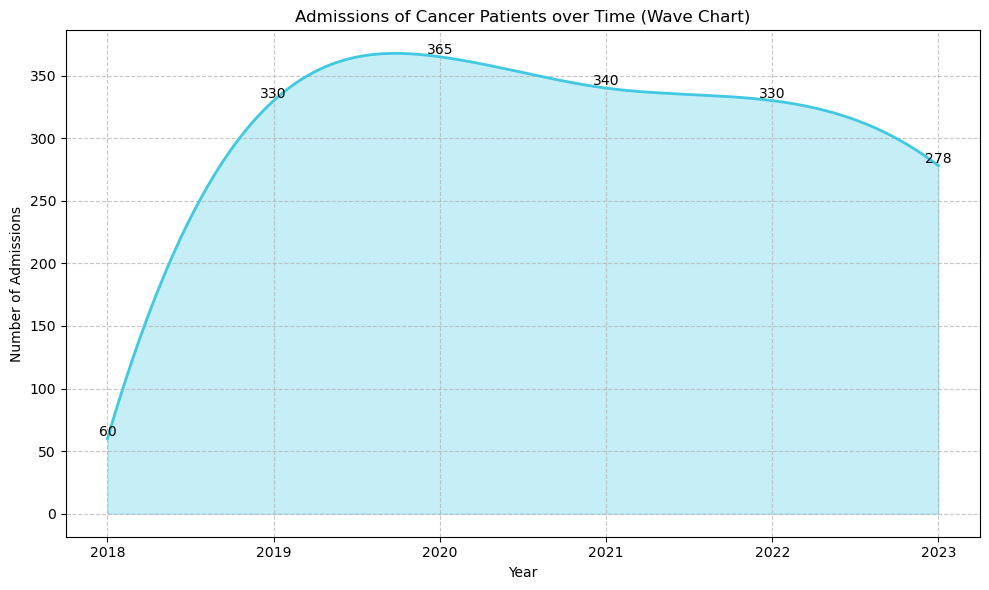

In [12]:
from scipy.interpolate import make_interp_spline

# Filtering the data to include only cancer patients
cancer_df = df[df['Medical Condition'] == 'Cancer'].copy()

# Extracting the year from the 'Date of Admission' column
cancer_df['Year'] = pd.to_datetime(cancer_df['Date of Admission']).dt.year

# Grouped the data by year and counted the number of admissions for each year
admissions_by_year = cancer_df.groupby('Year').size().reset_index(name='Admissions')

# Smooth the data for a wave-like effect
x_smooth = np.linspace(admissions_by_year['Year'].min(), admissions_by_year['Year'].max(), 300)
y_smooth = make_interp_spline(admissions_by_year['Year'], admissions_by_year['Admissions'])(x_smooth)

# Plot the wave chart 
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='#41C9E2', linewidth=2)
plt.fill_between(x_smooth, y_smooth, color='#41C9E2', alpha=0.3)
plt.title('Admissions of Cancer Patients over Time (Wave Chart)')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)


for index, row in admissions_by_year.iterrows():
    plt.text(row['Year'], row['Admissions'], str(row['Admissions']), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Question 6: Gender-based Analysis of Test Results among Individuals Diagnosed with Diabetes

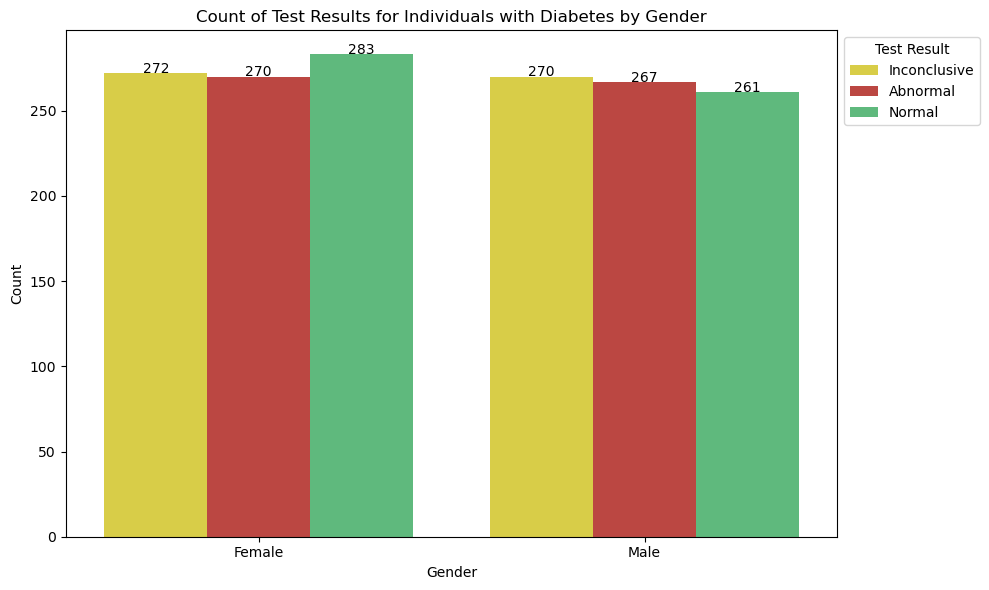

In [33]:
diabetes_df = df[df['Medical Condition'] == 'Diabetes']

# Plotting 
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=diabetes_df, x='Gender', hue='Test Results',
palette={'Inconclusive': '#F0E130', 'Abnormal': '#CF352E', 'Normal': '#50C878'})

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center')

plt.title('Count of Test Results for Individuals with Diabetes by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Result', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

# Question 7: Gender-based Analysis of Test Results among Individuals Diagnosed with Obesity

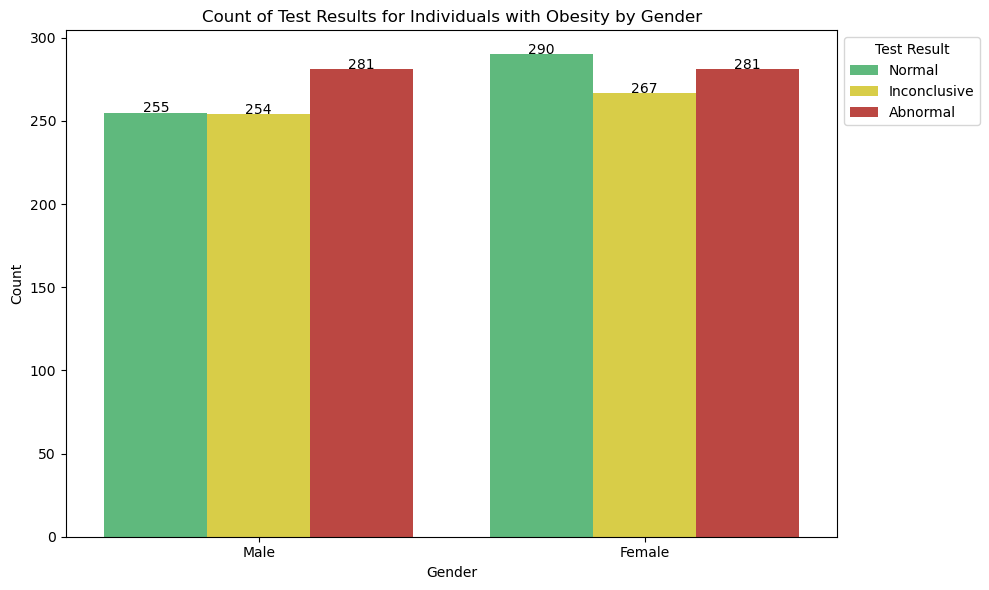

In [29]:
obesity_df = df[df['Medical Condition'] == 'Obesity']

# Plotting 
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=obesity_df, x='Gender', hue='Test Results',
palette={'Inconclusive': '#F0e130', 'Abnormal': '#CF352E', 'Normal': '#50C878'})

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center')

plt.title('Count of Test Results for Individuals with Obesity by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Result', bbox_to_anchor=(1, 1))


plt.tight_layout()
plt.show()

# Question 8: Gender-based Analysis of Test Results among Individuals Diagnosed with Cancer

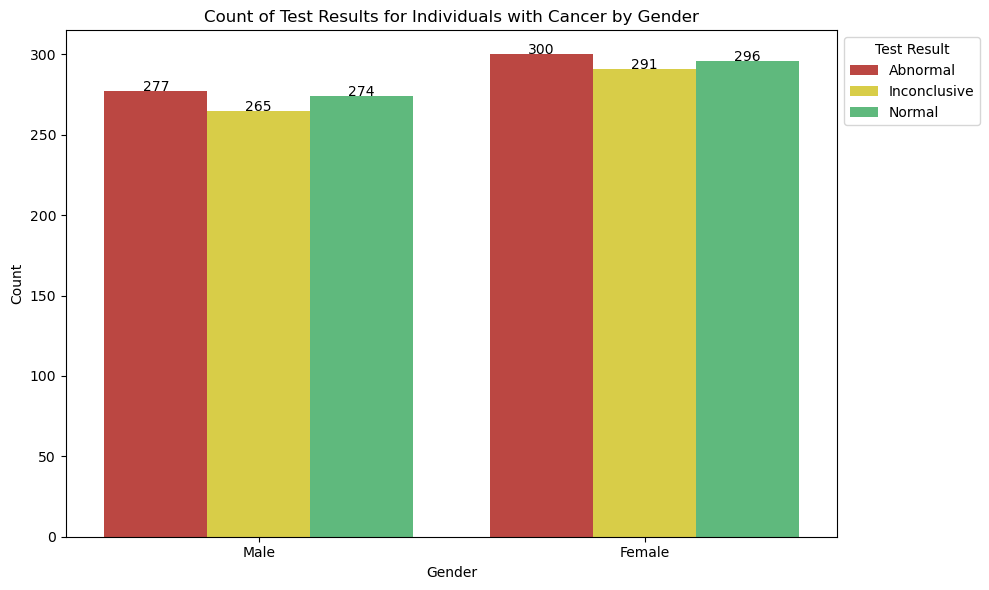

In [34]:
cancer_df = df[df['Medical Condition'] == 'Cancer']

# Plotting 
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=cancer_df, x='Gender', hue='Test Results', 
palette={'Inconclusive': '#F0E130', 'Abnormal': '#CF352E', 'Normal': '#50C878'})

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, int(height), ha='center')

plt.title('Count of Test Results for Individuals with Cancer by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Test Result', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()